In [24]:
import polars as pl
import numpy as np

In [26]:
# Load the training data
train_df = pl.read_csv("data/data/train.csv")

# Display the first few rows
print("Training data head:")
train_df.head()


Training data head:


id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
i64,str,str,f64,str,f64,str,str,f64,f64,str,f64
0,"""Mystery Matters""","""Episode 98""",null,"""True Crime""",74.81,"""Thursday""","""Night""",null,0.0,"""Positive""",31.41998
1,"""Joke Junction""","""Episode 26""",119.8,"""Comedy""",66.95,"""Saturday""","""Afternoon""",75.95,2.0,"""Negative""",88.01241
2,"""Study Sessions""","""Episode 16""",73.9,"""Education""",69.97,"""Tuesday""","""Evening""",8.97,0.0,"""Negative""",44.92531
3,"""Digital Digest""","""Episode 45""",67.17,"""Technology""",57.22,"""Monday""","""Morning""",78.7,2.0,"""Positive""",46.27824
4,"""Mind & Body""","""Episode 86""",110.51,"""Health""",80.07,"""Monday""","""Afternoon""",58.68,3.0,"""Neutral""",75.61031


In [3]:
train_df.shape, train_df.dtypes  

((750000, 12),
 [Int64,
  String,
  String,
  Float64,
  String,
  Float64,
  String,
  String,
  Float64,
  Float64,
  String,
  Float64])

In [4]:
numeric_cols = [
    "Episode_Length_minutes",
    "Host_Popularity_percentage",
    "Guest_Popularity_percentage",
    "Number_of_Ads",
    "Listening_Time_minutes",
]

train_df.select(numeric_cols).describe()

statistic,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
str,f64,f64,f64,f64,f64
"""count""",662907.0,750000.0,603970.0,749999.0,750000.0
"""null_count""",87093.0,0.0,146030.0,1.0,0.0
"""mean""",64.504738,59.859901,52.236449,1.348855,45.437406
"""std""",32.969603,22.873098,28.451241,1.15113,27.138306
"""min""",0.0,1.3,0.0,0.0,0.0
"""25%""",35.73,39.41,28.38,0.0,23.17835
"""50%""",63.84,60.05,53.58,1.0,43.37946
"""75%""",94.07,79.53,76.6,2.0,64.81158
"""max""",325.24,119.46,119.91,103.91,119.97


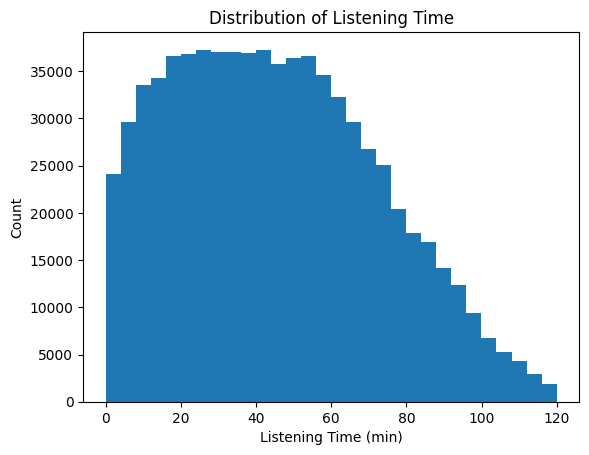

In [5]:
import matplotlib.pyplot as plt

arr = train_df["Listening_Time_minutes"].drop_nulls().to_numpy()
plt.hist(arr, bins=30)
plt.xlabel("Listening Time (min)")
plt.ylabel("Count")
plt.title("Distribution of Listening Time")
plt.show()

<Figure size 800x400 with 0 Axes>

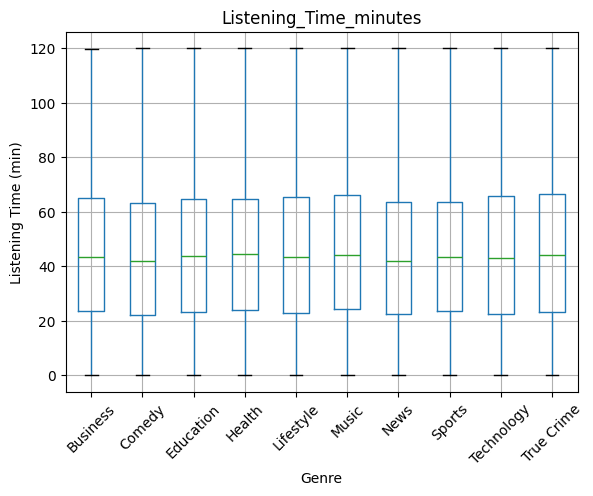

In [6]:
pdf = train_df.to_pandas()
plt.figure(figsize=(8,4))
pdf.boxplot(column="Listening_Time_minutes", by="Genre", rot=45)
plt.suptitle("")
plt.ylabel("Listening Time (min)")
plt.show()

In [7]:
corr = (
    train_df
    .select(numeric_cols)
    .to_pandas()
    .corr()
)
print(corr["Listening_Time_minutes"].sort_values(ascending=False))

Listening_Time_minutes         1.000000
Episode_Length_minutes         0.916749
Host_Popularity_percentage     0.050870
Guest_Popularity_percentage   -0.016014
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64


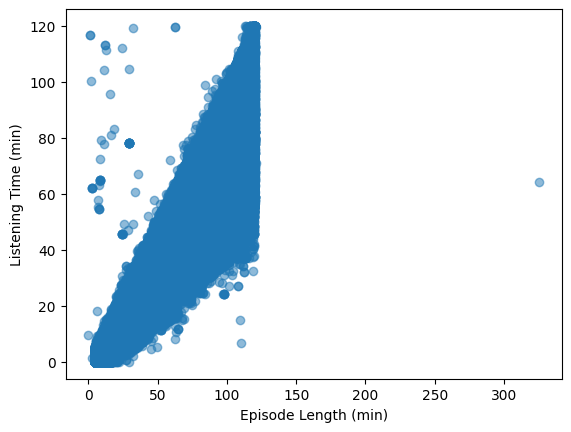

In [8]:
plt.scatter(
    train_df["Episode_Length_minutes"].to_numpy(),
    train_df["Listening_Time_minutes"].to_numpy(),
    alpha=0.5
)
plt.xlabel("Episode Length (min)")
plt.ylabel("Listening Time (min)")
plt.show()

In [11]:
for cat in ["Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]:
    summary = (
        train_df
        .group_by(cat)
        .agg([
            pl.col("Listening_Time_minutes").mean().alias("mean_listen"),
            pl.col("Listening_Time_minutes").median().alias("median_listen"),
            pl.count().alias("n_episodes")
        ])
        .sort("mean_listen")
    )
    print(f"\n=== {cat} ===")
    print(summary)


=== Genre ===
shape: (10, 4)
┌────────────┬─────────────┬───────────────┬────────────┐
│ Genre      ┆ mean_listen ┆ median_listen ┆ n_episodes │
│ ---        ┆ ---         ┆ ---           ┆ ---        │
│ str        ┆ f64         ┆ f64           ┆ u32        │
╞════════════╪═════════════╪═══════════════╪════════════╡
│ News       ┆ 44.406144   ┆ 42.00382      ┆ 63385      │
│ Comedy     ┆ 44.426441   ┆ 41.94508      ┆ 81453      │
│ Sports     ┆ 44.935722   ┆ 43.467305     ┆ 87606      │
│ Lifestyle  ┆ 45.523117   ┆ 43.5339       ┆ 82461      │
│ Business   ┆ 45.538151   ┆ 43.30314      ┆ 80521      │
│ Technology ┆ 45.634749   ┆ 42.89973      ┆ 86256      │
│ Education  ┆ 45.73664    ┆ 43.942355     ┆ 49100      │
│ Health     ┆ 45.741413   ┆ 44.51089      ┆ 71416      │
│ True Crime ┆ 46.042507   ┆ 44.06049      ┆ 85059      │
│ Music      ┆ 46.578394   ┆ 44.22         ┆ 62743      │
└────────────┴─────────────┴───────────────┴────────────┘

=== Publication_Day ===
shape: (7, 4)
┌──

/var/folders/jb/ckb_b9f94m5dvhsy6d9bwn800000gn/T/ipykernel_95147/1043691970.py:8: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("n_episodes")


In [12]:
df = train_df.with_columns([
    pl.col("Episode_Length_minutes").is_null().alias("len_missing"),
    pl.col("Guest_Popularity_percentage").is_null().alias("guest_missing")
])

for flag in ["len_missing", "guest_missing"]:
    print(
        df.group_by(flag)
          .agg(pl.col("Listening_Time_minutes").mean())
    )

shape: (2, 2)
┌─────────────┬────────────────────────┐
│ len_missing ┆ Listening_Time_minutes │
│ ---         ┆ ---                    │
│ bool        ┆ f64                    │
╞═════════════╪════════════════════════╡
│ false       ┆ 45.737987              │
│ true        ┆ 43.149538              │
└─────────────┴────────────────────────┘
shape: (2, 2)
┌───────────────┬────────────────────────┐
│ guest_missing ┆ Listening_Time_minutes │
│ ---           ┆ ---                    │
│ bool          ┆ f64                    │
╞═══════════════╪════════════════════════╡
│ true          ┆ 45.279453              │
│ false         ┆ 45.475597              │
└───────────────┴────────────────────────┘


In [16]:
train_df = (
    train_df
    .with_columns([
        (pl.col("Listening_Time_minutes") / pl.col("Episode_Length_minutes"))
           .alias("listen_ratio"),
        (pl.col("Number_of_Ads") / pl.col("Episode_Length_minutes"))
           .alias("ad_density"),
        (pl.col("Host_Popularity_percentage") - pl.col("Guest_Popularity_percentage").fill_null(0))
           .alias("pop_gap"),
        pl.col("Publication_Day")
          .map_elements(lambda d: ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"].index(d) + 1)
          .alias("pub_day_num")
    ])
)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


In [17]:
train_df.head(5)

id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,listen_ratio,ad_density,pop_gap,pub_day_num
i64,str,str,f64,str,f64,str,str,f64,f64,str,f64,f64,f64,f64,i64
0,"""Mystery Matters""","""Episode 98""",null,"""True Crime""",74.81,"""Thursday""","""Night""",null,0.0,"""Positive""",31.41998,null,null,74.81,4
1,"""Joke Junction""","""Episode 26""",119.8,"""Comedy""",66.95,"""Saturday""","""Afternoon""",75.95,2.0,"""Negative""",88.01241,0.734661,0.016694,-9.0,6
2,"""Study Sessions""","""Episode 16""",73.9,"""Education""",69.97,"""Tuesday""","""Evening""",8.97,0.0,"""Negative""",44.92531,0.60792,0.0,61.0,2
3,"""Digital Digest""","""Episode 45""",67.17,"""Technology""",57.22,"""Monday""","""Morning""",78.7,2.0,"""Positive""",46.27824,0.688972,0.029775,-21.48,1
4,"""Mind & Body""","""Episode 86""",110.51,"""Health""",80.07,"""Monday""","""Afternoon""",58.68,3.0,"""Neutral""",75.61031,0.684194,0.027147,21.39,1


In [18]:
corr_matrix = (
    train_df
    .select([
        pl.col("listen_ratio"),
        pl.col("ad_density"),
        pl.col("pop_gap"),
        pl.col("pub_day_num"),
        pl.col("Listening_Time_minutes")
    ])
    .corr()
)

print(corr_matrix)

shape: (5, 5)
┌──────────────┬────────────┬──────────┬─────────────┬────────────────────────┐
│ listen_ratio ┆ ad_density ┆ pop_gap  ┆ pub_day_num ┆ Listening_Time_minutes │
│ ---          ┆ ---        ┆ ---      ┆ ---         ┆ ---                    │
│ f64          ┆ f64        ┆ f64      ┆ f64         ┆ f64                    │
╞══════════════╪════════════╪══════════╪═════════════╪════════════════════════╡
│ NaN          ┆ NaN        ┆ NaN      ┆ NaN         ┆ NaN                    │
│ NaN          ┆ NaN        ┆ NaN      ┆ NaN         ┆ NaN                    │
│ NaN          ┆ NaN        ┆ 1.0      ┆ 0.000831    ┆ 0.036869               │
│ NaN          ┆ NaN        ┆ 0.000831 ┆ 1.0         ┆ -0.015009              │
│ NaN          ┆ NaN        ┆ 0.036869 ┆ -0.015009   ┆ 1.0                    │
└──────────────┴────────────┴──────────┴─────────────┴────────────────────────┘


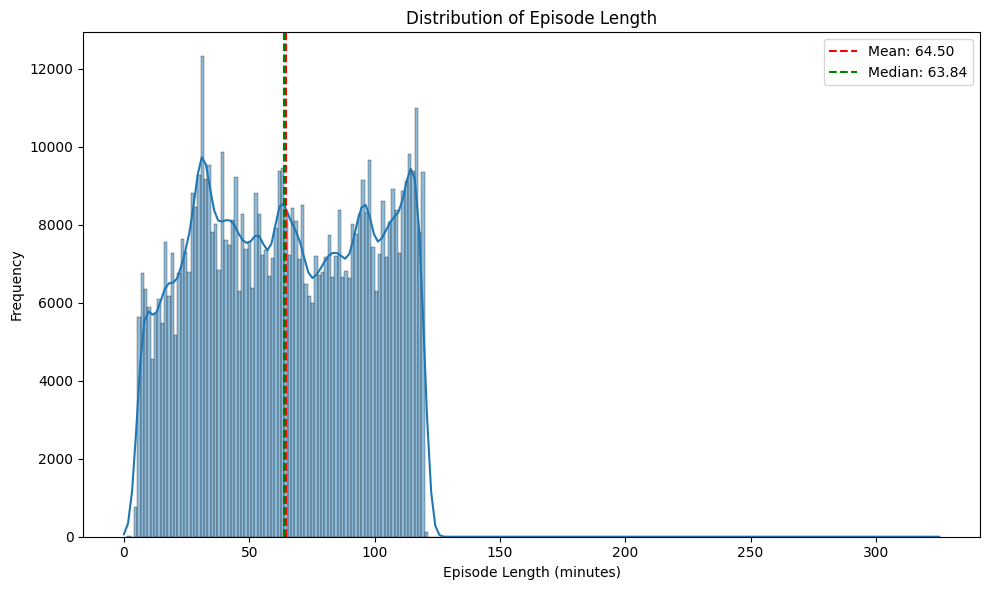

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df["Episode_Length_minutes"].drop_nulls(), kde=True)
plt.title('Distribution of Episode Length')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Frequency')
plt.axvline(train_df["Episode_Length_minutes"].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Episode_Length_minutes"].mean():.2f}')
plt.axvline(train_df["Episode_Length_minutes"].median(), color='green', linestyle='--', label=f'Median: {train_df["Episode_Length_minutes"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()


## Impute Missing Listening Time

In [23]:
from sklearn.ensemble import RandomForestRegressor

train = train_df.filter(pl.col("Episode_Length_minutes").is_not_null()).to_pandas()
test  = train_df.filter(pl.col("Episode_Length_minutes").is_null()).to_pandas()

features = ["Host_Popularity_percentage", "Guest_Popularity_percentage", "Number_of_Ads"]
X_train = train[features]
y_train = train["Episode_Length_minutes"]
X_test  = test[features]

# fit & predict
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

test["Episode_Length_imp"] = preds
train["Episode_Length_imp"] = train["Episode_Length_minutes"]

# combine
import pandas as pd
combined = pd.concat([train, test], sort=False)
df = pl.from_pandas(combined)